# Tyre Management dashboard

Tyre management is a crucial aspect of Formula 1 racing. The right tire choice and effective tire management can mean the difference between a podium finish and a disappointing result.

Formula 1 cars use a range of Pirelli tyre, including dry-weather tires, wet-weather tires, intermediate tires, and full-wet tires. The choice of tire depends on the track conditions and weather forecast. 

### FIA Tyre rules:
- Each team is allowed to use up to 13 sets of dry-weather tires per car per race weekend. This includes three sets of tires for the first free practice session, two sets for the second free practice session, and eight sets for the rest of the race weekend (including qualifying and the race).
- Each team is also allowed to use up to four sets of wet-weather tires per car per race weekend. These tires can be used in any session of the race weekend.
- In addition to these tire allocations, each team is also allowed to use up to two sets of tire testing compounds per car per year. These compounds are used for testing and development purposes and cannot be used in a race.
- Teams and drivers must use at least two different tire compounds during a race, with one of these compounds being the harder compound. This rule is intended to encourage teams and drivers to use different tire strategies and make multiple pit stops during a race.
- Teams and drivers are also required to use both tire compounds during the race, with at least one lap being completed on each compound. This rule is intended to encourage teams and drivers to use both tire compounds during a race and to prevent them from focusing solely on one compound.

## Problem:
assuming some variables:
This is not related to any race, we are just using some base numbers to help convey the topic
```
    start_laptime <- 95 (seconds)
    fueldeg <- 0.06 (Fuel deg is a factor for gain in lap time from the reduction in weight of the fuel)
    laps <- 1:70 (1:total laps)
    tyre1 <- "soft" 
    tyre2 <- "medium"
    tyre3 <- "hard"
```

We also have three different tyre compounds, with `soft` being the quickest but least durable and `hard` being the slowest but most durable.

```
    soft:
        ds: 0
        dr: 0.2
        dc: 0.1  
    medium:
        ds: 0.75
        dr: 0.08
        dc: 0.08
    hard:
        ds: 1.5
        dr: 0.06
        dc: 0.07
 ```
 DS: Difference on how much slower the tyre is compared to the base soft tyre
 DR: Is the base degradation rate
 DC: Is the change in degradation rate
 
Tyres have what is called a `cliff` built into them, we can attempt to account for this as a compound interest model.
 
Taking these factors and using any race data available, design a dashboard to help visualise pit windows during a race, and some strategies for number of stops

For simplicity of the data we will use the FastF1 api (https://docs.fastf1.dev/index.html) and have provided sample code to extract Race data for the Candian GP 2023.

This piece of work was inspired by the article: https://www.r-bloggers.com/2021/09/f1-strategy-analysis/

In [2]:
import fastf1 as ff1
import fastf1.plotting
from matplotlib import pyplot as plt
import os
import pandas as pd

In [3]:
# Directory for the cache
cache_dir = 'cache_folder'

# Create the directory if it doesn't exist
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)

ff1.Cache.enable_cache('cache_folder')

In [4]:
session = ff1.get_session(2023, "Canada", 'R')
session.load()
laps = session.laps

core           INFO 	Loading data for Canadian Grand Prix - Race [v3.0.6]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '44', '16', '55', '11', '23', '31', '18', '77', '81', '10', '4', '22', '27', '24', '20', '21', '63', '2']


In [10]:
drivers = session.drivers
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]

In [11]:
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()
stints = stints.rename(columns={"LapNumber": "StintLength"})

In [14]:
stints

,Driver,Stint,Compound,StintLength
0,ALB,1.0,MEDIUM,12
1,ALB,2.0,HARD,58
2,ALO,1.0,MEDIUM,12
3,ALO,2.0,HARD,29
4,ALO,3.0,HARD,29
5,BOT,1.0,HARD,36
6,BOT,2.0,MEDIUM,34
7,DEV,1.0,MEDIUM,11
8,DEV,2.0,HARD,39
9,DEV,3.0,HARD,19


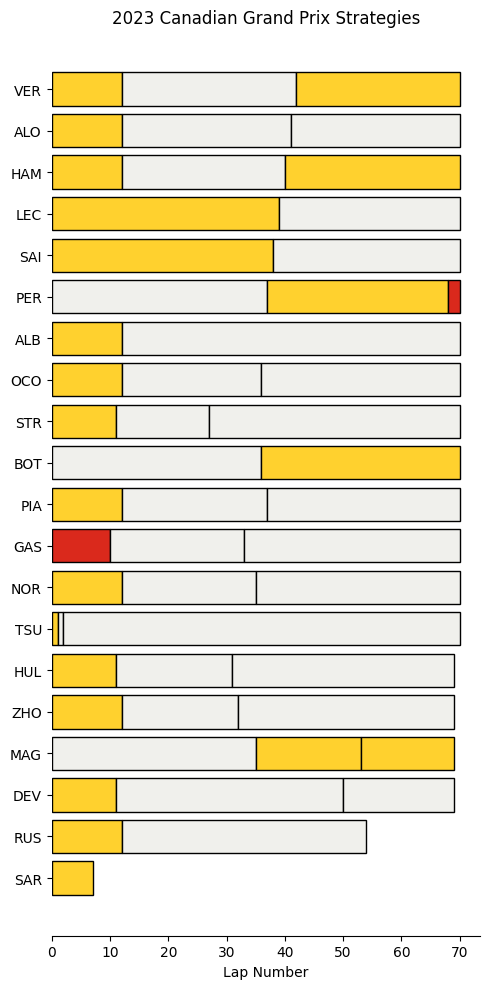

In [13]:
fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=fastf1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]
        
plt.title("2023 Canadian Grand Prix Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()